<a href="https://colab.research.google.com/github/MarionM2/AI/blob/main/Final_Copy_of_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
df= pd.read_csv("/content/drive/MyDrive/Dataset/Maize Production in Kenya(1) - data - Maize Production in Kenya(1) - data (1) - Maize Production in Kenya(1) - data - Maize Production in Kenya(1) - data (1).csv")

In [79]:
df.head(10)

,County,Area,Precipitation,Year,Temperature,Fertilizer(Kg),Production
0,Baringo,"39,753",1423.72,2012,21.02,"4,527","71,867"
1,Baringo,"29,117",1349.11,2013,21.29,"3,314","55,805"
2,Baringo,"34,960",924.75,2014,21.19,"3,980","34,959"
3,Baringo,"44,159",1205.25,2015,21.22,"5,028","83,313"
4,Baringo,"33,163",1038.43,2016,21.68,"3,562","72,495"
5,Baringo,"33,308",1486.25,2017,21.44,"3,451","45,764"
6,Baringo,"37,658",1632.36,2018,21.15,5646,58475.6
7,Baringo,"47,437",1446.97,2020,21.51,6333,68374.39
8,Bomet,"32,697",1964.29,2012,17.64,5947,"73,278"
9,Bomet,"30,620",1842.46,2013,17.88,"5,569","72,236"


In [80]:
df.shape

(184, 7)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   County          184 non-null    object 
 1   Area            184 non-null    object 
 2   Precipitation   184 non-null    object 
 3   Year            184 non-null    int64  
 4   Temperature     184 non-null    float64
 5   Fertilizer(Kg)  184 non-null    object 
 6   Production      184 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.2+ KB


In [82]:
df.isnull().sum()

County            0
Area              0
Precipitation     0
Year              0
Temperature       0
Fertilizer(Kg)    0
Production        0
dtype: int64

In [83]:
df['Area'] = df['Area'].str.replace(',', '').astype(float).astype(int)
df['Production'] = df['Production'].str.replace(',', '').astype(float).astype(int)
df['Precipitation'] = pd.to_numeric(df['Precipitation'], errors='coerce')
df['Fertilizer(Kg)'] = df['Fertilizer(Kg)'].str.replace(',', '').astype(float).astype(int)

# Check the data types again
print(df.dtypes)


County             object
Area                int64
Precipitation     float64
Year                int64
Temperature       float64
Fertilizer(Kg)      int64
Production          int64
dtype: object


In [84]:
df.duplicated().sum()

0

In [85]:
df.isnull().sum()

County            0
Area              0
Precipitation     1
Year              0
Temperature       0
Fertilizer(Kg)    0
Production        0
dtype: int64

In [86]:
mean_precipitation = df['Precipitation'].mean()
df['Precipitation'].fillna(mean_precipitation, inplace=True)

In [87]:
df.isnull().sum()

County            0
Area              0
Precipitation     0
Year              0
Temperature       0
Fertilizer(Kg)    0
Production        0
dtype: int64

In [88]:
len(df['County'].unique())

23

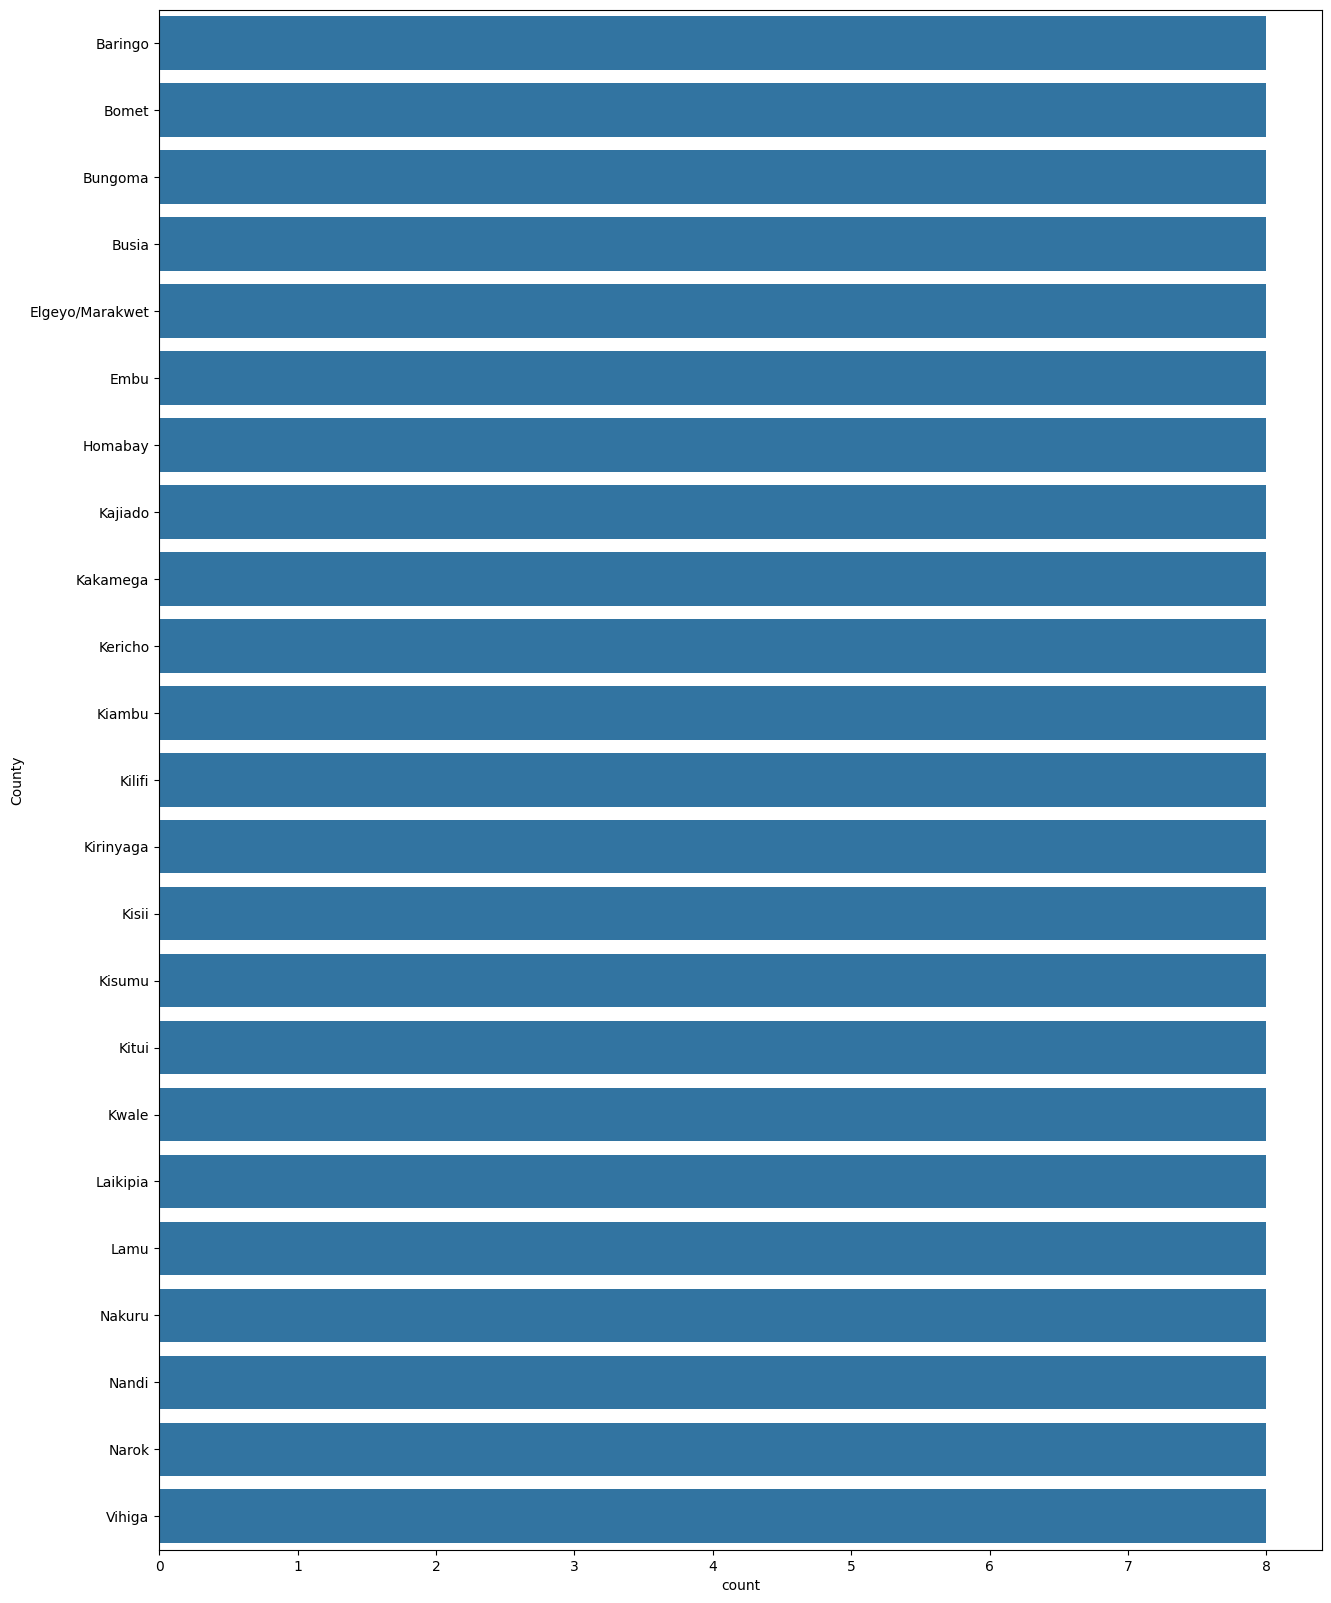

In [89]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['County'])
plt.show()

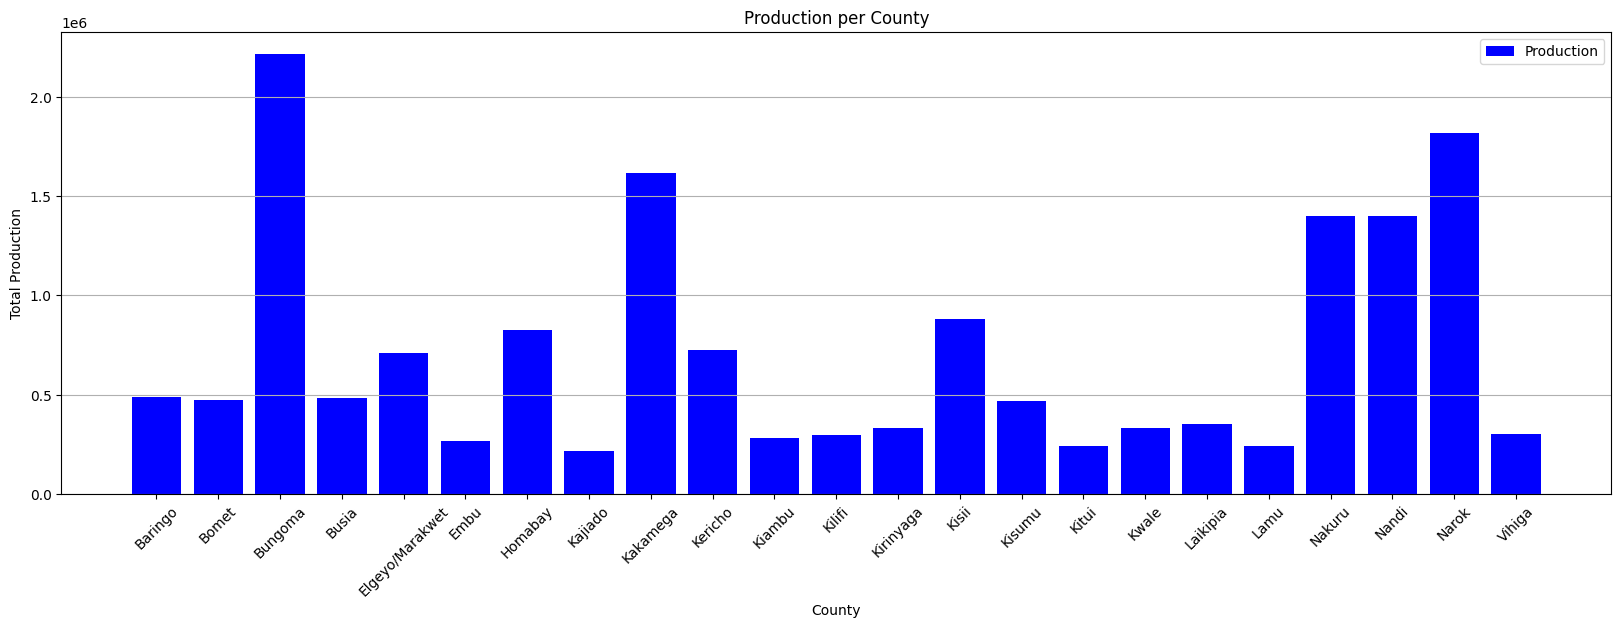

In [90]:
county = df['County'].unique()
yield_per_county = []
for state in county:
    yield_per_county.append(df[df['County']==state]['Production'].sum())
# Plot bar graph for both fertilizer usage
plt.figure(figsize=(20, 6))
plt.bar(counties, yield_per_county, color='blue', label='Production')
plt.xlabel('County')
plt.ylabel('Total Production')
plt.title('Production per County')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

In [91]:
df['Production'].sum()

16384329

In [92]:
yield_per_county

[491052,
 471459,
 2215286,
 483712,
 710628,
 268867,
 828301,
 217085,
 1616378,
 726391,
 281904,
 298559,
 332429,
 881596,
 467917,
 241043,
 332466,
 354492,
 241341,
 1398069,
 1402239,
 1818412,
 304703]

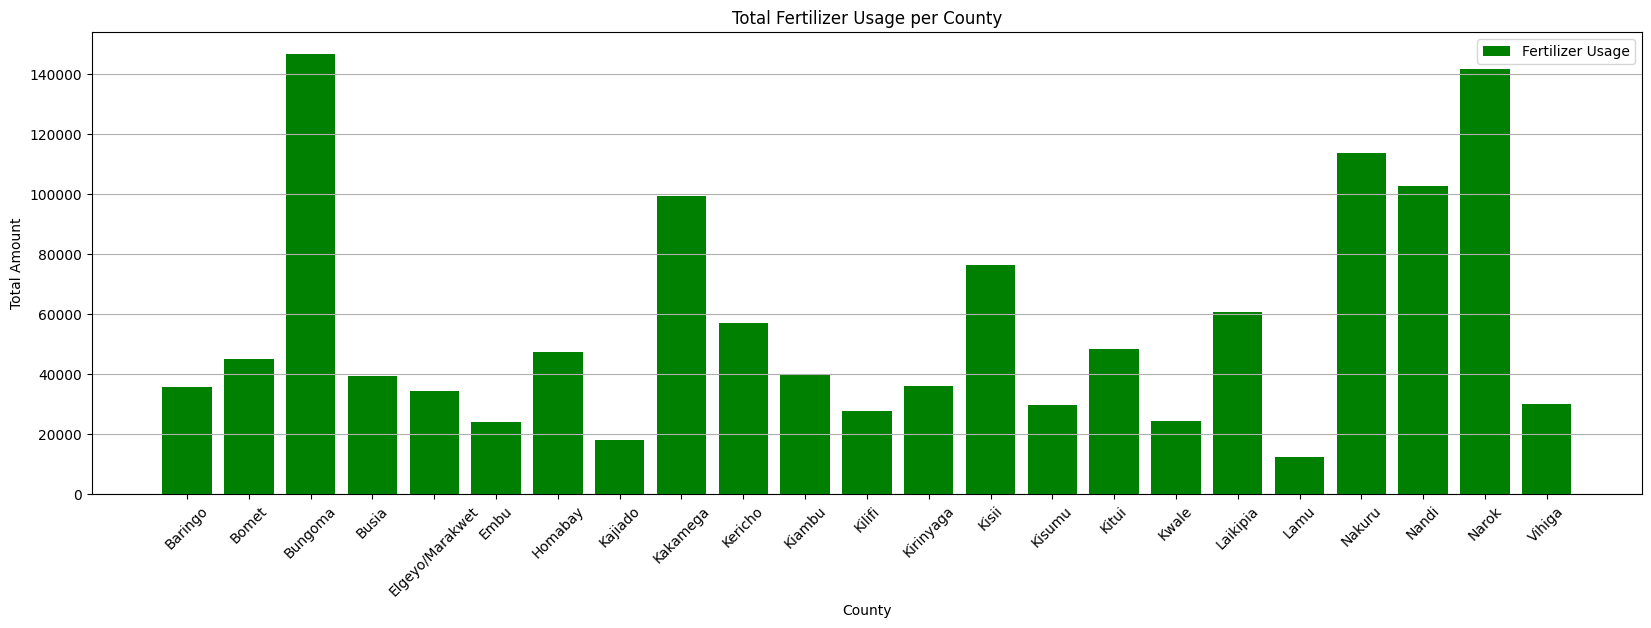

In [93]:
# Get unique counties
counties = df['County'].unique()

# Calculate total fertilizer usage per county
fertilizer_per_county = []
for county in counties:
    fertilizer_per_county.append(df[df['County'] == county]['Fertilizer(Kg)'].sum())

# Plot bar graph for both fertilizer usage
plt.figure(figsize=(20, 6))
plt.bar(counties, fertilizer_per_county, color='green', label='Fertilizer Usage')
plt.xlabel('County')
plt.ylabel('Total Amount')
plt.title('Total Fertilizer Usage per County')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

In [94]:
fertilizer_per_county

[35841,
 44975,
 146637,
 39316,
 34386,
 23947,
 47375,
 18110,
 99490,
 56917,
 39942,
 27560,
 35944,
 76490,
 29834,
 48461,
 24327,
 60719,
 12404,
 113572,
 102708,
 141507,
 30128]

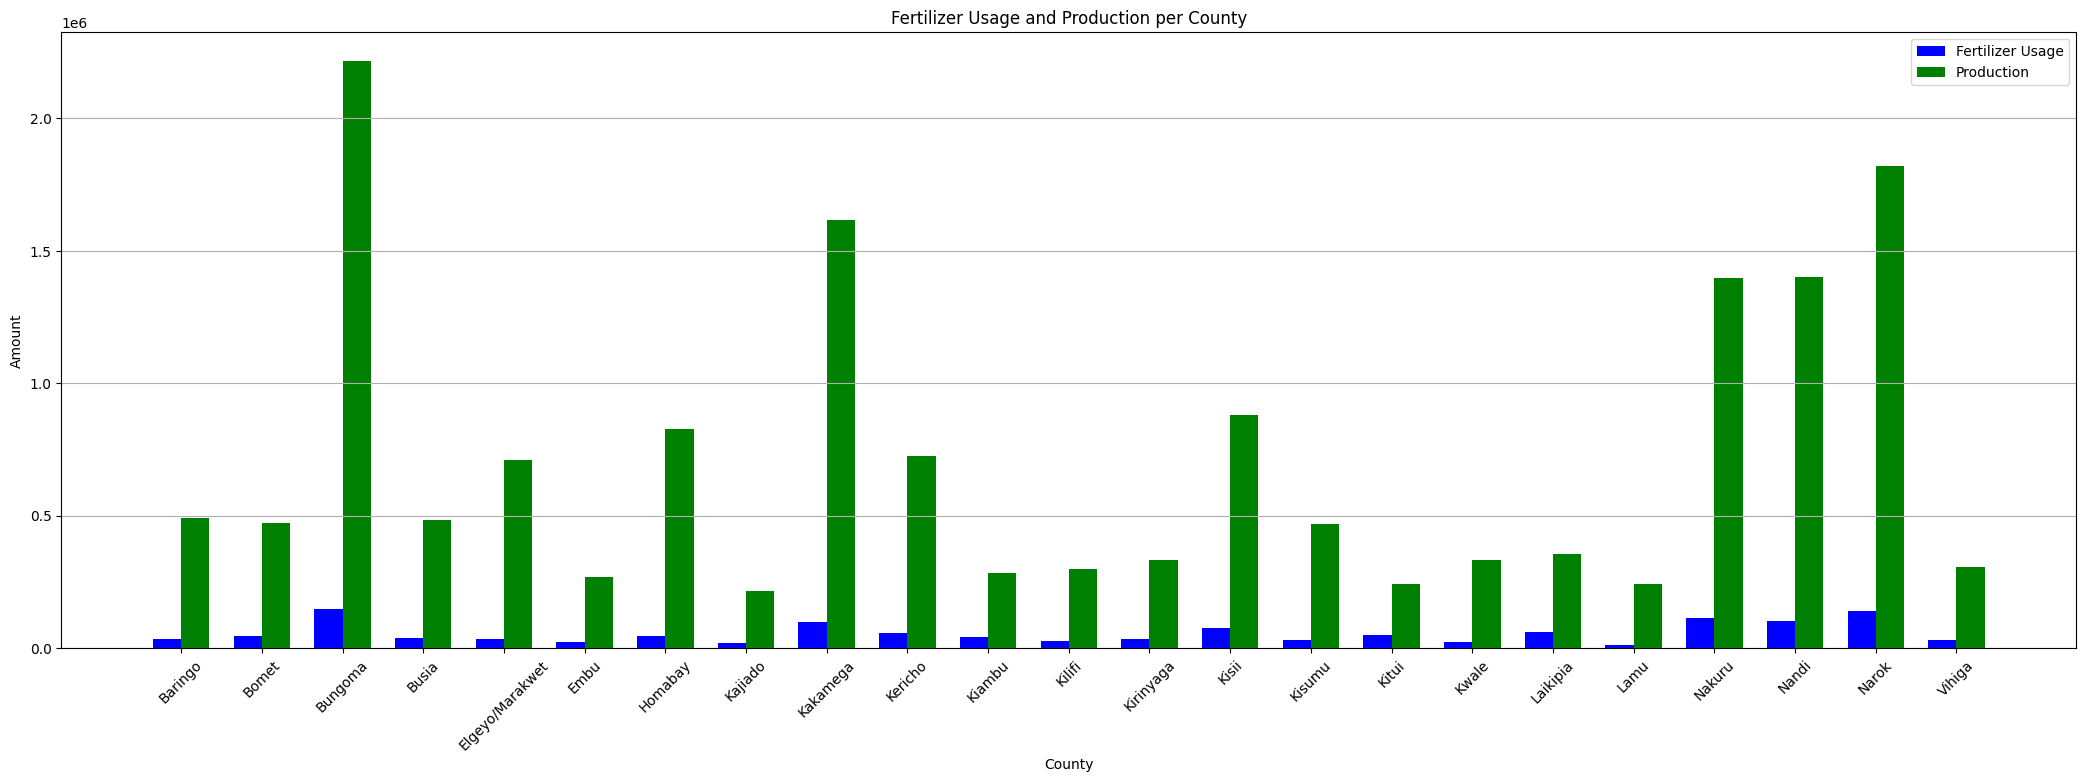

In [95]:
# Get unique counties
counties = df['County'].unique()

# Calculate total fertilizer usage per county
fertilizer_per_county = []
for county in counties:
    fertilizer_per_county.append(df[df['County'] == county]['Fertilizer(Kg)'].sum())

# Calculate total production per county
production_per_county = []
for county in counties:
    production_per_county.append(df[df['County'] == county]['Production'].sum())

# Set the positions for the bars
pos = np.arange(len(counties))

# Plot vertical bar graph for both fertilizer usage and production
plt.figure(figsize=(26, 8))
bar_width = 0.35
plt.bar(pos, fertilizer_per_county, bar_width, label='Fertilizer Usage', color='blue')
plt.bar(pos + bar_width, production_per_county, bar_width, label='Production', color='green')
plt.xticks(pos + bar_width / 2, counties, rotation=45)
plt.ylabel('Amount')
plt.xlabel('County')
plt.title('Fertilizer Usage and Production per County')
plt.legend()
plt.grid(axis='y')
plt.show()

In [96]:
df.head()


,County,Area,Precipitation,Year,Temperature,Fertilizer(Kg),Production
0,Baringo,39753,1423.72,2012,21.02,4527,71867
1,Baringo,29117,1349.11,2013,21.29,3314,55805
2,Baringo,34960,924.75,2014,21.19,3980,34959
3,Baringo,44159,1205.25,2015,21.22,5028,83313
4,Baringo,33163,1038.43,2016,21.68,3562,72495


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   County          184 non-null    object 
 1   Area            184 non-null    int64  
 2   Precipitation   184 non-null    float64
 3   Year            184 non-null    int64  
 4   Temperature     184 non-null    float64
 5   Fertilizer(Kg)  184 non-null    int64  
 6   Production      184 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 10.2+ KB


In [98]:
df.skew()

<ipython-input-98-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Area              2.182520
Precipitation    -0.002524
Year              0.239092
Temperature       0.569445
Fertilizer(Kg)    2.200386
Production        1.274702
dtype: float64

In [99]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['County']=le.fit_transform(df['County'])

In [100]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [101]:
X.head()

,County,Area,Precipitation,Year,Temperature,Fertilizer(Kg)
0,0,39753,1423.72,2012,21.02,4527
1,0,29117,1349.11,2013,21.29,3314
2,0,34960,924.75,2014,21.19,3980
3,0,44159,1205.25,2015,21.22,5028
4,0,33163,1038.43,2016,21.68,3562


In [102]:
y.unique()

array([ 71867,  55805,  34959,  83313,  72495,  45764,  58475,  68374,
        73278,  72236,  53162,  38720,  45517,  56601,  58336,  73609,
       262381, 221586, 267302, 260266, 301068, 289290, 295481, 317912,
        50102,  63230,  72662,  86526,  36631,  51483,  53629,  69449,
        91964, 101336, 103448,  78020,  75005,  80823,  92601,  87431,
        46750,  35105,  26611,  49156,  16104,  28378,  32113,  34650,
        97513, 110380, 124465, 137958,  71446,  93405, 100741,  92393,
         2218,  63460,  73396,  20004,  11016,  12751,  18698,  15542,
       172308, 172683, 182397, 224225, 172350, 227237, 238290, 226888,
        98549,  80022,  68913,  85698,  91832, 103245, 105402,  92730,
        27831,  21609,   7384,  58260,  55837,  35506,  32219,  43258,
        18625,    310,    300, 103830,  28114,  48121,  54675,  44584,
        46562,  48237,  37183,  58896,  30168,  37756,  33347,  40280,
        13023, 119703, 100231,  96054, 168102, 154181, 132789,  61453,
      

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1)

In [104]:
print("Training data",x_train.shape)

Training data (128, 6)


In [105]:
print("Training data",x_test.shape)

Training data (56, 6)


In [106]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'Rid': Ridge(),
    'Dtr': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

for name, md in models.items():
    md.fit(x_train, y_train)
    y_pred = md.predict(x_test)

    print(f"{name} : mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")

lr : mae : 31081.294134271073 score : 0.6982140619687427
lss : mae : 31081.288102349234 score : 0.6982164597122344
Rid : mae : 31081.395926553556 score : 0.6982327196109666
Dtr : mae : 33079.107142857145 score : 0.4681058077768627
KNN : mae : 32536.589285714286 score : 0.588704177920669


In [107]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.predict(x_test)

array([252781.49224418,  17206.46433403,  74144.16761889, 113841.04558346,
        48036.19827993,  77667.35129845,  87157.34418677, 100894.10697629,
        56970.03687101,  76553.96665253,  58394.74887642, 168848.25497962,
        88501.91072141,  38517.50890463,  39895.95445951,  45572.99605211,
        88133.10132591,  72099.91460539,  69786.43386877, 110109.75462941,
        39313.21270174,  37664.48037142,  95122.84506907,  35244.27575193,
       247479.84805042,  82074.82435784,  54774.85938896, 156719.19149558,
       147462.66777584,  35874.70664007,  80529.50605157, 173676.88053416,
        75468.98837699, 127188.39062251, 163332.7599807 ,  30249.77892991,
       115958.23849046,  58546.12822169, 143373.48746807, 245339.76532802,
        67410.94615362,  52600.67840166,  51189.01212858, 119888.77145976,
        50432.25246   , 113259.00601473, 103114.23750811,  26049.537387  ,
       124668.79599856,  64124.36967294,  17676.55103924,  68083.41012898,
        64210.1956353 ,  

In [108]:
# Assuming you have already fitted your Ridge model and obtained predictions
predictions = lr.predict(x_test)

# Create a DataFrame to store actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Display the DataFrame
print(comparison_df)

     Actual      Predicted
16   262381  252781.492244
145   33585   17206.464334
95    44584   74144.167619
158  179198  113841.045583
47    34650   48036.198280
118   70913   77667.351298
53    93405   87157.344187
31    69449  100894.106976
4     72495   56970.036871
35    78020   76553.966653
40    46750   58394.748876
153  231412  168848.254980
54   100741   88501.910721
124    7433   38517.508905
122   30585   39895.954460
114   54651   45572.996052
48    97513   88133.101326
119   67306   72099.914605
126   22966   69786.433869
11    38720  110109.754629
82     7384   39313.212702
136  119852   37664.480371
14    58336   95122.845069
42    26611   35244.275752
19   260266  247479.848050
94    54675   82074.824358
178   36605   54774.859389
162  167219  156719.191496
107  100231  147462.667776
59    20004   35874.706640
29    51483   80529.506052
69   227237  173676.880534
177   36241   75468.988377
165  197272  127188.390623
174  208306  163332.759981
56     2218   30249.778930
1

In [109]:
import pickle
pickle.dump(lr,open('lr.pkl','wb'))